#  Архитектура Transformer

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://arxiv.org/pdf/1706.03762.pdf
* https://peterbloem.nl/blog/transformers
* https://www.youtube.com/watch?v=qKL9hWQQQic
* https://www.youtube.com/watch?v=U0s0f995w14
* https://towardsdatascience.com/a-detailed-guide-to-pytorchs-nn-transformer-module-c80afbc9ffb1
* https://nlp.seas.harvard.edu/2018/04/03/attention.html
* https://pytorch.org/tutorials/beginner/transformer_tutorial.html
* https://kazemnejad.com/blog/transformer_architecture_positional_encoding/

## Задачи для самостоятельного разбора

1. Рассмотрите пример работы слоя `nn.Transformer`.

In [66]:
import torch.nn as nn
import torch as th

In [67]:
batch_size = 16
x_seq_len = 10
y_seq_len = 11
embedding_dim = 32

x = th.randint(0, 100, size=(x_seq_len, batch_size))
y = th.randint(0, 100, size=(y_seq_len, batch_size))
x.shape, y.shape

(torch.Size([10, 16]), torch.Size([11, 16]))

In [68]:
word_emb_x = nn.Embedding(100, embedding_dim)
word_emb_y = nn.Embedding(100, embedding_dim)
word_emb_x

Embedding(100, 32)

In [69]:
src = word_emb_x(x)
trg = word_emb_y(y)

In [70]:
src.shape, trg.shape    # x_seq_len x batch_size x embedding_dim

(torch.Size([10, 16, 32]), torch.Size([11, 16, 32]))

In [71]:
transformer = nn.Transformer(
    d_model=embedding_dim,
    nhead=2,
    num_encoder_layers=2,
    num_decoder_layers=2,
    dropout=0.2
)

In [72]:
trg_mask = transformer.generate_square_subsequent_mask(y_seq_len)
trg_mask

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [73]:
out = transformer(src, trg, tgt_mask=trg_mask)
out.shape   #y_seq_len x batch_size x emb_dim

torch.Size([11, 16, 32])

In [74]:
out.shape

torch.Size([11, 16, 32])

In [75]:
positions = th.arange(0, x_seq_len).expand(batch_size, x_seq_len).T
positions.shape

torch.Size([10, 16])

In [76]:
positional_embedding = nn.Embedding(x_seq_len, embedding_dim)

pos_encoding =  positional_embedding(positions)

In [77]:
pos_encoding.shape

torch.Size([10, 16, 32])

In [78]:
dropout = nn.Dropout(p=0.5)
dropout(src + pos_encoding)

tensor([[[-1.2909, -3.1909,  0.0000,  ..., -1.7929, -0.0000,  0.0000],
         [ 1.8084,  0.7235, -0.0000,  ..., -3.1690, -0.0000, -0.0000],
         [ 2.6927, -1.7666,  0.0000,  ..., -0.2645,  1.6710, -0.0000],
         ...,
         [ 0.8740, -3.8690,  0.3460,  ..., -0.4069, -0.0000, -0.0000],
         [ 0.0000, -0.0321,  0.0000,  ..., -2.0277, -2.0078, -0.0000],
         [ 3.5395,  1.7682,  1.9287,  ..., -0.0000, -1.4896, -0.0000]],

        [[ 0.0000,  2.4893,  0.0000,  ...,  0.0000,  2.0249, -0.0000],
         [ 4.7286,  0.0000,  1.3272,  ...,  0.0000,  0.0000, -0.0000],
         [ 1.3258,  0.0000, -0.0000,  ...,  0.0000,  0.0000, -0.9169],
         ...,
         [ 0.0000,  3.8984, -0.0000,  ...,  0.0000,  1.1008,  0.0000],
         [ 0.0000,  1.7322, -0.0000,  ...,  0.0000,  0.0000,  1.1447],
         [ 0.0000,  2.7027,  0.0000,  ...,  1.2657, -1.3334, -0.0000]],

        [[-4.0406,  0.1577, -0.0000,  ..., -3.8433,  0.0000, -3.2692],
         [-3.0128,  1.2170,  0.0000,  ..., -3

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте наборы данных для решения задачи машинного перевода на основе файлов `RuBQ_2.0_train.json` (обучающее множество) и `RuBQ_2.0_test.json`.

- [ ] Проверено на семинаре

In [79]:
import pandas as pd

In [80]:
import pandas as pd

test = pd.read_json('/content/drive/MyDrive/пм21_финашка/3 курс/NLP/04_rnn/RuBQ_2.0_test.json')
train = pd.read_json('/content/drive/MyDrive/пм21_финашка/3 курс/NLP/04_rnn/RuBQ_2.0_train.json')
train.head()

,uid,question_text,query,answer_text,question_uris,question_props,answers,paragraphs_uids,tags,RuBQ_version,question_eng
0,0,Что может вызвать цунами?,SELECT ?answer \nWHERE {\n wd:Q8070 wdt:P828 ...,Землетрясение,[http://www.wikidata.org/entity/Q8070],[wdt:P828],"[{'type': 'uri', 'label': 'землетрясение', 'va...","{'with_answer': [35622], 'all_related': [35622...",[1-hop],1,What can cause a tsunami?
1,1,Кто написал роман «Хижина дяди Тома»?,SELECT ?answer \nWHERE {\n wd:Q2222 wdt:P50 ?...,Г. Бичер-Стоу,[http://www.wikidata.org/entity/Q2222],[wdt:P50],"[{'type': 'uri', 'label': 'Гарриет Бичер-Стоу'...","{'with_answer': [35652], 'all_related': [35652...",[1-hop],1,"Who wrote the novel ""uncle Tom's Cabin""?"
2,2,Кто автор пьесы «Ромео и Джульетта»?,SELECT ?answer \nWHERE {\n wd:Q83186 wdt:P50 ...,Шекспир,[http://www.wikidata.org/entity/Q83186],[wdt:P50],"[{'type': 'uri', 'label': 'Уильям Шекспир', 'v...","{'with_answer': [35676, 35677], 'all_related':...",[1-hop],1,"Who is the author of the play ""Romeo and Juliet""?"
3,3,Как называется столица Румынии?,SELECT ?answer \nWHERE {\n wd:Q218 wdt:P36 ?a...,Бухарест,[http://www.wikidata.org/entity/Q218],[wdt:P36],"[{'type': 'uri', 'label': 'Бухарест', 'value':...","{'with_answer': [35702, 35703], 'all_related':...",[1-hop],1,What is the name of the capital of Romania?
4,5,На каком инструменте играл Джимми Хендрикс?,SELECT ?answer \nWHERE {\n wd:Q5928 wdt:P1303...,Гитара,[http://www.wikidata.org/entity/Q5928],[wdt:P1303],"[{'type': 'uri', 'label': 'гитара', 'value': '...","{'with_answer': [35728, 35727], 'all_related':...",[1-hop],1,What instrument did Jimi Hendrix play?


In [81]:
train_ru = train.question_text.values
train_en = train.question_eng.values

test_ru = test.question_text.values
test_en = test.question_eng.values
train_ru

array(['Что может вызвать цунами?',
       'Кто написал роман «Хижина дяди Тома»?',
       'Кто автор пьесы «Ромео и Джульетта»?', ...,
       'В каком году сняли с производства Jaguar E-type?',
       'С какого года закончили выпускать Rolls-Royce Silver Ghost?',
       'В каком году сняли с производства Porsche 550?'], dtype=object)

In [82]:
from torchtext.vocab import Vocab
from torchtext.vocab import build_vocab_from_iterator

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
import re
pattern_ru = re.compile(r'[^А-Яа-яёЁ]+')
pattern_en = re.compile(r'[^A-Za-z]+')

def del_punctuation(df, pattern):
  res = []
  for i in df:
    stroka = re.sub(pattern,' ', i)
    res.append(word_tokenize(stroka))

  return res

train_ru = del_punctuation(train_ru, pattern_ru)
train_en = del_punctuation(train_en, pattern_en)

test_ru = del_punctuation(test_ru, pattern_ru)
test_en = del_punctuation(test_en, pattern_en)
test_en[:10]

[['Which',
  'country',
  'does',
  'the',
  'famous',
  'Easter',
  'island',
  'belong',
  'to'],
 ['Which',
  'music',
  'group',
  'is',
  'Mick',
  'Jagger',
  's',
  'name',
  'inextricably',
  'linked',
  'to'],
 ['Where', 'is', 'the', 'Summer', 'garden'],
 ['Which', 'city', 'is', 'the', 'capital', 'of', 'Turkmenistan'],
 ['In',
  'which',
  'city',
  'was',
  'the',
  'first',
  'Russian',
  'revolutionary',
  'newspaper',
  'Kolokol',
  'published',
  'since',
  'by',
  'A',
  'Herzen',
  'and',
  'N',
  'Ogarev'],
 ['Which',
  'country',
  'has',
  'the',
  'second',
  'highest',
  'active',
  'volcano',
  'with',
  'the',
  'funny',
  'name',
  'Popocatepetl',
  'm'],
 ['In', 'what', 'sport', 'was', 'Kournikova', 'famous'],
 ['What', 'city', 'was', 'Wolfgang', 'Amadeus', 'Mozart', 'born', 'in'],
 ['What', 'city', 'was', 'John', 'Lennon', 'killed', 'in'],
 ['What',
  'country',
  'was',
  'the',
  'inventor',
  'of',
  'the',
  'Morse',
  'code',
  'Telegraph',
  'a',
  'citi

In [84]:
token = ['<PAD>', '<SOS>', '<EOS>']

vocab_ru = build_vocab_from_iterator(
    train_ru,
    specials = token
)

vocab_en = build_vocab_from_iterator(
    train_en,
    specials = token
)

len(vocab_ru), len(vocab_en)

(5959, 4348)

In [85]:
import torchtext.transforms as T

In [86]:
class Dataset:

  def __init__(self, x, y, vocab_ru, vocab_en):

    self.x = x
    self.y = y
    self.vocab_ru = vocab_ru
    self.vocab_en = vocab_en
    self.transform_ru = self.transforms(self.vocab_ru)
    self.transform_en = self.transforms(self.vocab_en)

  def transforms(self, vocab):
    transf = T.Sequential(
        T.VocabTransform(vocab),
        T.AddToken(begin=True, token= vocab.get_stoi()['<SOS>']),
        T.AddToken(begin=False, token= vocab.get_stoi()['<EOS>']),
        T.ToTensor()
    )
    return transf

  def __getitem__(self, idx):

    if type(idx) == int:
      idx = slice(idx, idx+1)

    ru = self.transform_ru(self.x[idx]).squeeze(0)
    en = self.transform_en(self.y[idx]).squeeze(0)

    return ru, en

  def __len__(self):
    return len(self.x)



In [87]:
ds_train = Dataset(train_ru, train_en, vocab_ru, vocab_en)
ds_train

In [88]:
from torch.nn.utils.rnn import pad_sequence

In [89]:
class Collator:
  def __init__(self, pad_idx, batch_first=True):
    self.pad_idx = pad_idx
    self.batch_first = batch_first

  def __call__(self, batch):
    x = [x[0] for x in batch]
    y = [y[1] for y in batch]

    x = pad_sequence(
        x,
        batch_first=self.batch_first,
        padding_value=self.pad_idx
    )

    y = pad_sequence(
        y,
        batch_first=self.batch_first,
        padding_value=self.pad_idx
    )
    return x, y

In [90]:
from  torch.utils.data import DataLoader


loader_train = DataLoader(ds_train, batch_size=128, collate_fn=Collator(pad_idx=0, batch_first=True), drop_last= True)
loader_train

In [91]:
for x, y in loader_train:
    print(x.shape, y.shape)
    # break

torch.Size([128, 22]) torch.Size([128, 31])
torch.Size([128, 19]) torch.Size([128, 25])
torch.Size([128, 19]) torch.Size([128, 23])
torch.Size([128, 21]) torch.Size([128, 25])
torch.Size([128, 21]) torch.Size([128, 32])
torch.Size([128, 19]) torch.Size([128, 23])
torch.Size([128, 22]) torch.Size([128, 26])
torch.Size([128, 19]) torch.Size([128, 33])
torch.Size([128, 27]) torch.Size([128, 29])
torch.Size([128, 19]) torch.Size([128, 23])
torch.Size([128, 14]) torch.Size([128, 21])
torch.Size([128, 13]) torch.Size([128, 18])
torch.Size([128, 14]) torch.Size([128, 18])
torch.Size([128, 12]) torch.Size([128, 18])
torch.Size([128, 17]) torch.Size([128, 18])
torch.Size([128, 12]) torch.Size([128, 17])
torch.Size([128, 13]) torch.Size([128, 16])
torch.Size([128, 15]) torch.Size([128, 18])


In [92]:
max_seq_x, max_seq_y = max([max(x[1].shape) for x, y in loader_train]),  max([max(y[1].shape) for x, y in loader_train])
max_seq_x, max_seq_y

(27, 33)

In [93]:
token = ['<PAD>', '<SOS>', '<EOS>']

vocab_ru_test = build_vocab_from_iterator(
    test_ru,
    specials = token
)

vocab_en_test = build_vocab_from_iterator(
    test_en,
    specials = token
)

len(vocab_ru_test), len(vocab_en_test)

(1973, 1598)

In [94]:
ds_test = Dataset(test_ru, test_en, vocab_ru_test, vocab_en_test)

loader_test = DataLoader(
    ds_test,
    batch_size=216,
    collate_fn=Collator(batch_first=True, pad_idx=0)
)

# for x,y in loader_test:
#   print(x.shape, y.shape)

<p class="task" id="2"></p>

2\. Реализуйте класс `PositionalEncoding` для добавления информации о позиции токенов в эмбеддинг, который будет передаваться на вход слоя `nn.Transformer`. Кодирование реализуйте согласно следующим формулам:


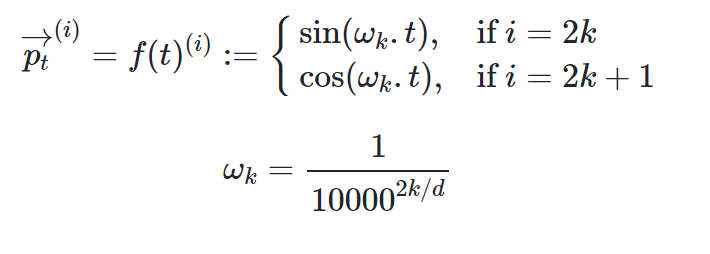
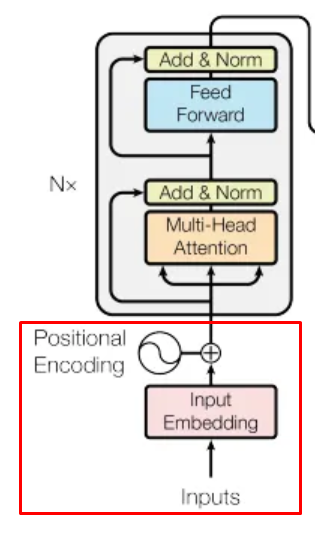

- [ ] Проверено на семинаре

In [95]:
import torch as th
import torch.nn as nn
import numpy as np

class PositionalEncoding(nn.Module):
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
    # d_model -- размерность эмбеддинга
    # max_len -- максимальная длина последовательности

        self.dropout = nn.Dropout(p = dropout_p)

        pos_encoding = th.zeros((max_len, dim_model))
        t = th.arange(0, max_len).reshape(-1,1)
        k = th.arange(0, dim_model, 2)
        w = 1/(10000**(k/dim_model))

        pos_encoding[:, 0::2] = th.sin(w*t)   # каждый четный столбец
        pos_encoding[:, 1::2] = th.cos(w*t)   # каждый нечетный столбец
        self.pos_encoding = pos_encoding.unsqueeze(1)
        # print(self.pos_encoding.shape)


    def forward(self, embeddings: th.Tensor) -> th.Tensor:
        # embeddings: seq_len x batch x embedding_size

        embeddings +=  self.pos_encoding[:embeddings.size(0), :]
        return self.dropout(embeddings)

In [96]:
x.shape, y.shape   # seq_len, batch_size

(torch.Size([128, 15]), torch.Size([128, 18]))

In [97]:
word_emb_x

Embedding(100, 32)

In [98]:
embedding_dim=300

word_emb_x = nn.Embedding(len(vocab_ru), embedding_dim=embedding_dim)
word_emb_y = nn.Embedding(len(vocab_en), embedding_dim=embedding_dim)
src = word_emb_x(x)
trg = word_emb_y(y)
src.shape, trg.shape    # x_seq_len x batch_size x embedding_dim

(torch.Size([128, 15, 300]), torch.Size([128, 18, 300]))

In [99]:
pos_emb = PositionalEncoding(dim_model = embedding_dim, dropout_p = 0.1, max_len = 500)
pos_emb

PositionalEncoding(
  (dropout): Dropout(p=0.1, inplace=False)
)

In [100]:
pos_emb(src.permute(1,0,2)).shape   # seq_len,batch_size, embedding_dim

torch.Size([15, 128, 300])

In [101]:
pos_emb(trg.permute(1,0,2)).shape   # seq_len,batch_size, embedding_dim

torch.Size([18, 128, 300])

<p class="task" id="3"></p>

3\. Реализуйте класс `Transformer`. Получите батч из набора данных, пропустите его через слой и проверьте работоспособность.

- [ ] Проверено на семинаре

In [102]:
import torch as th
import torch.nn as nn

class Transformer(nn.Module):
    def __init__(
        self,
        n_ru_words,
        n_en_words,
        max_seq_len_ru,
        max_seq_len_en,
        d_model,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        dropout_p,
    ):
        super().__init__()
        self.transformer = nn.Transformer(d_model = d_model, nhead = num_heads, num_encoder_layers=num_encoder_layers, num_decoder_layers=num_decoder_layers,dropout = dropout_p)
        self.positional_encoder_ru = PositionalEncoding(dim_model = d_model, dropout_p= dropout_p, max_len = max_seq_len_ru)
        self.positional_encoder_en = PositionalEncoding(dim_model = d_model, dropout_p= dropout_p, max_len = max_seq_len_en)
        self.embedding_ru = nn.Embedding(num_embeddings= n_ru_words, embedding_dim= d_model)
        self.embedding_en = nn.Embedding(num_embeddings= n_en_words, embedding_dim= d_model)

        self.out = nn.Linear(in_features = d_model, out_features= n_en_words)
        # self.softmax = nn.Softmax(dim = 1)



    def get_trg_mask(self, size: int) -> th.Tensor:
        # Генерирует аддитивную маску для masked self attention декодера
        # Пример для size=5:
        # [[0., -inf, -inf, -inf, -inf],
        #  [0.,   0., -inf, -inf, -inf],
        #  [0.,   0.,   0., -inf, -inf],
        #  [0.,   0.,   0.,   0., -inf],
        #  [0.,   0.,   0.,   0.,   0.]]
        return self.transformer.generate_square_subsequent_mask(size)

    def create_pad_mask(self, matrix: th.Tensor, pad_token: int) -> th.Tensor:
        # Генерирует маску для токена <PAD>
        # matrix = [1,2,3,0,0,0], pad_token=0 = > [False, False, False, True, True, True]
        return (matrix == pad_token)

    def forward(self, src, trg, src_pad_mask=None, trg_mask=None, trg_pad_mask=None):
        # src: ru_seq_len x batch_size
        # trg: en_seq_len x batch_size

        # Получить эмбеддинги токенов и positional encoding
        # src: ru_seq_len x batch_size x d_model
        # trg: en_seq_len x batch_size x d_model
        src_emb = self.embedding_ru(src)
        trg_emb = self.embedding_ru(trg)
        print(src_emb.shape, trg_emb.shape)   # batch_size x seq_len x  d_model

        src_emb_pe = self.positional_encoder_ru(src_emb.permute(1,0,2))
        trg_emb_pe = self.positional_encoder_en(trg_emb.permute(1,0,2))
        # print(src_emb_pe.shape, trg_emb_pe.shape)   # seq_len x batch_size x d_model


        # Transformer blocks - Out size = (sequence length, batch_size, num_tokens)
        # transformer_out: en_seq_len x batch_size x d_model
        transformer_out = self.transformer(src_emb_pe, trg_emb_pe,  tgt_mask=trg_mask, src_key_padding_mask = src_pad_mask, tgt_key_padding_mask = trg_pad_mask)
        # print(transformer_out.shape)
        # out: en_seq_len x batch_size x n_en_words
        out = self.out(transformer_out)
        return out

In [103]:
x.shape, y.shape

(torch.Size([128, 15]), torch.Size([128, 18]))

In [104]:
model = Transformer(
    n_ru_words = len(vocab_ru),
    n_en_words = len(vocab_en),
    max_seq_len_ru = max_seq_x,
    max_seq_len_en = max_seq_y,
    d_model = embedding_dim,
    num_heads=2,
    num_encoder_layers=5,
    num_decoder_layers=5,
    dropout_p = 0.1
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [105]:
src.shape

torch.Size([128, 15, 300])

In [106]:
en_seq_len = y.shape[1]; en_seq_len

18

In [107]:
out = model(x,
      y,
      trg_mask = model.get_trg_mask(en_seq_len),
      src_pad_mask = model.create_pad_mask(x, 0),
      trg_pad_mask = model.create_pad_mask(y, 0)
      )

out

torch.Size([128, 15, 300]) torch.Size([128, 18, 300])


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:5076: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


tensor([[[ 0.2868,  0.7395,  0.5830,  ...,  1.0762,  1.1898, -0.7673],
         [ 0.7507, -0.2747, -0.0830,  ...,  0.3747,  0.5175, -0.5883],
         [ 0.4567,  0.5844, -0.1276,  ...,  0.7957,  0.6112, -1.2649],
         ...,
         [ 0.6924,  0.6799, -0.3852,  ...,  0.6936,  0.5259, -1.1674],
         [ 0.6933,  0.2263, -0.5600,  ...,  0.7438, -0.1432, -1.6059],
         [ 0.5339,  0.5016,  0.3264,  ...,  0.9145,  0.1680, -1.8617]],

        [[ 0.7067,  0.4844,  0.3101,  ...,  0.7665,  1.0906, -1.2099],
         [ 0.6571, -0.1730,  0.6653,  ...,  0.2686,  0.5611, -1.0256],
         [ 0.7700,  0.5477, -0.3332,  ...,  0.7407,  0.4092, -1.3467],
         ...,
         [ 0.6402,  0.4676,  0.1751,  ...,  0.9889,  0.6361, -1.3960],
         [ 0.6035,  0.0424, -0.2755,  ...,  0.1701,  0.3628, -1.0329],
         [ 0.7299,  0.3298, -0.0375,  ...,  0.9199,  0.2754, -1.5172]],

        [[ 0.6540,  0.7867,  0.8937,  ...,  0.6125,  0.9267, -1.4867],
         [ 0.7616, -0.3741, -0.4834,  ...,  0

In [108]:
out.shape   # en_seq_len, batch_size, len(vocab_en)

torch.Size([18, 128, 4348])

<p class="task" id="4"></p>

4\. Обучите модель машинного перевода, используя архитектуру Transformer. Во время обучения выводите на экран значения функции потерь для эпохи (на обучающем множестве), значение accuracy по токенам (на обучающем множестве) и пример перевода, сгенерированного моделью. После завершения обучения посчитайте BLEU для тестового множества.


- [ ] Проверено на семинаре

In [109]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")
device

device(type='cuda')

In [110]:
import torch as th
import torch.nn as nn
import numpy as np

class PositionalEncoding(nn.Module):
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
    # d_model -- размерность эмбеддинга
    # max_len -- максимальная длина последовательности

        self.dropout = nn.Dropout(p = dropout_p).to(device)

        pos_encoding = th.zeros((max_len, dim_model)).to(device)
        t = th.arange(0, max_len).reshape(-1,1).to(device)
        k = th.arange(0, dim_model, 2).to(device)
        w = 1/(10000**(k/dim_model)).to(device)

        pos_encoding[:, 0::2] = th.sin(w*t)   # каждый четный столбец
        pos_encoding[:, 1::2] = th.cos(w*t)   # каждый нечетный столбец
        self.pos_encoding = pos_encoding.unsqueeze(1).to(device)
        # print(self.pos_encoding.shape)


    def forward(self, embeddings: th.Tensor) -> th.Tensor:
        # embeddings: seq_len x batch x embedding_size

        embeddings +=  self.pos_encoding[:embeddings.size(0), :]
        return self.dropout(embeddings).to(device)

In [111]:
import torch as th
import torch.nn as nn

class Transformer(nn.Module):
    def __init__(
        self,
        n_ru_words,
        n_en_words,
        max_seq_len_ru,
        max_seq_len_en,
        d_model,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        dropout_p,
    ):
        super().__init__()
        self.transformer = nn.Transformer(d_model = d_model, nhead = num_heads, num_encoder_layers=num_encoder_layers, num_decoder_layers=num_decoder_layers,dropout = dropout_p).to(device)
        self.positional_encoder_ru = PositionalEncoding(dim_model = d_model, dropout_p= dropout_p, max_len = max_seq_len_ru).to(device)
        self.positional_encoder_en = PositionalEncoding(dim_model = d_model, dropout_p= dropout_p, max_len = max_seq_len_en).to(device)
        self.embedding_ru = nn.Embedding(num_embeddings= n_ru_words, embedding_dim= d_model).to(device)
        self.embedding_en = nn.Embedding(num_embeddings= n_en_words, embedding_dim= d_model).to(device)

        self.out = nn.Linear(in_features = d_model, out_features= n_en_words).to(device)
        self.softmax = nn.Softmax(dim  = 1)



    def get_trg_mask(self, size: int) -> th.Tensor:
        # Генерирует аддитивную маску для masked self attention декодера
        # Пример для size=5:
        # [[0., -inf, -inf, -inf, -inf],
        #  [0.,   0., -inf, -inf, -inf],
        #  [0.,   0.,   0., -inf, -inf],
        #  [0.,   0.,   0.,   0., -inf],
        #  [0.,   0.,   0.,   0.,   0.]]
        return self.transformer.generate_square_subsequent_mask(size).to(device)

    def create_pad_mask(self, matrix: th.Tensor, pad_token: int) -> th.Tensor:
        # Генерирует маску для токена <PAD>
        # matrix = [1,2,3,0,0,0], pad_token=0 = > [False, False, False, True, True, True]
        return (matrix == pad_token)

    def forward(self, src, trg, src_pad_mask=None, trg_mask=None, trg_pad_mask=None):
        # src: ru_seq_len x batch_size
        # trg: en_seq_len x batch_size

        # Получить эмбеддинги токенов и positional encoding
        # src: ru_seq_len x batch_size x d_model
        # trg: en_seq_len x batch_size x d_model
        src_emb = self.embedding_ru(src).to(device)
        trg_emb = self.embedding_ru(trg).to(device)
        # print(src_emb.shape, trg_emb.shape)   # batch_size x seq_len x  d_model

        src_emb_pe = self.positional_encoder_ru(src_emb.permute(1,0,2)).to(device)
        trg_emb_pe = self.positional_encoder_en(trg_emb.permute(1,0,2)).to(device)
        # print(src_emb_pe.shape, trg_emb_pe.shape)   # seq_len x batch_size x d_model


        # Transformer blocks - Out size = (sequence length, batch_size, num_tokens)
        # transformer_out: en_seq_len x batch_size x d_model
        transformer_out = self.transformer(src_emb_pe, trg_emb_pe,  tgt_mask=trg_mask, src_key_padding_mask = src_pad_mask, tgt_key_padding_mask = trg_pad_mask).to(device)
        # print(transformer_out.shape)
        # out: en_seq_len x batch_size x n_en_words
        out = self.out(transformer_out).to(device)
        return self.softmax(out)

In [112]:
model = Transformer(
    n_ru_words = len(vocab_ru),
    n_en_words = len(vocab_en),
    max_seq_len_ru = max_seq_x,
    max_seq_len_en = max_seq_y,
    d_model = embedding_dim,
    num_heads=2,
    num_encoder_layers=5,
    num_decoder_layers=5,
    dropout_p = 0.1
).to(device)

In [114]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss(ignore_index=0)
n_epochs = 50
optimizer = optim.Adam(model.parameters(), lr = 0.01)
model = model.to(device)


for epoch in range(n_epochs):

  correct_tokens = 0
  total_tokens = 0
  for x, y in loader_train:

    x = x.to(device)
    y = y.to(device)
    out = model(x,
      y,
      trg_mask = model.get_trg_mask(y.shape[1]).to(device),
      src_pad_mask = model.create_pad_mask(x, 0).to(device),
      trg_pad_mask = model.create_pad_mask(y, 0).to(device)
      )   # seq_len, batch_size, len(vocab_en)

    # print(out.permute(1,2,0).shape)   # batch_size, len(vocab_en), seq_len,
    # print(y.shape)  # batch_size, seq_len

    loss = criterion(out.permute(1,2,0), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    predicted_tokens = th.argmax(out, dim=-1)
    # print(predicted_tokens.shape)
    # print(y.shape)
    correct_tokens += th.sum(predicted_tokens.T == y).item()    # кол-во верно предсказанных токенов
    # print(correct_tokens)

    total_tokens += y.numel()

  accuracy = correct_tokens / total_tokens
  if (epoch+1) % 10 == 0 or epoch == 0:
    print(f'Epoch {epoch+1}, loss = {loss.item()}')
    print(f'Accuracy --> {accuracy}')

    idx = np.random.randint(predicted_tokens.shape[0])
    original = ''
    for i in x[idx]:
        if vocab_ru.get_itos()[i] not in ['<SOS>', '<EOS>', '<PAD>']:
            original += vocab_ru.get_itos()[i]+' '

    translate = ''
    for i in predicted_tokens[idx]:
        if vocab_en.get_itos()[i] not in ['<SOS>', '<EOS>', '<PAD>']:
            translate += vocab_en.get_itos()[i]+' '

    print(f'Russian = {original}\n English = {translate}\n')


Epoch 1, loss = 8.378610610961914
Accuracy --> 0.0009246678743961353
Russian = Кто спроектировал мост Васко да Гама 
 English = Viy Liza Freddie film suicide Garden element conquer pipe johnny Ortega version Antoine Brest played romance Liza biologists named Garry Thomas Three military commissioned Alien monetary dead Autonomous London Forces On chapel iPhone level Ireland Sakharov border holding Exchange husband sea V where use develop sea academician that vzveytes marinkina Iliad sticks fire University title ethylene unit first reaction ship hosting Queen has birthplace up Presidential Kaynarca Olympic not Romania Cathedral Sanssouci S building city purchased Scissorhands time S Yaik is would included of the bull length high Lake unification Tsoi Ashanti do fields nebula chronicle was composed city Gogh spend S Solidarity Sharik year Turkic did Which river constellation audience Moses Prosecutor chip military high States until Zenit Russia film Chukovsky s percent European where almo

In [115]:
from nltk.translate.bleu_score import corpus_bleu

## Обратная связь
- [ ] Хочу получить обратную связь по решению